In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [2]:
plt.style.set = "ggplot2"

In [3]:
dataset = pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

In [4]:
dataset.loc[0,"description"]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [5]:
dataset.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<Axes: >

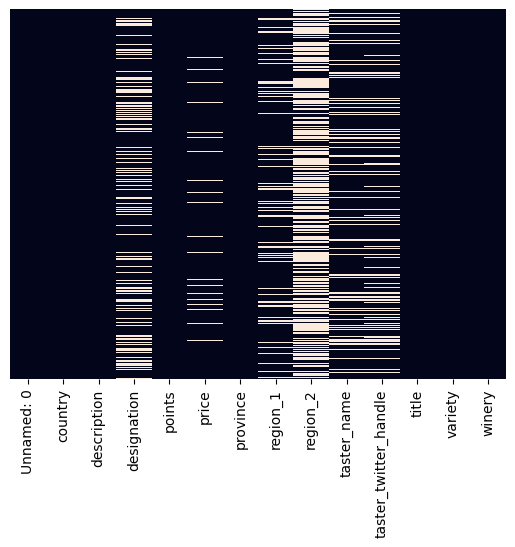

In [6]:
sb.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [7]:
dataset['designation'] = dataset['designation'].fillna('Unknown')

In [8]:
wine = dataset.drop(['Unnamed: 0','region_1','region_2','taster_twitter_handle'], axis=1)
wine.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,description,designation,points,price,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<Axes: >

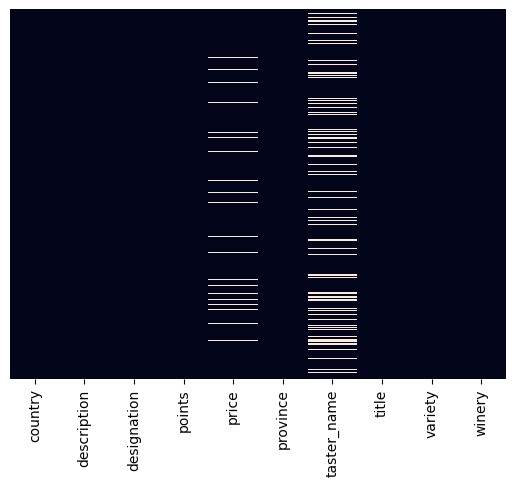

In [9]:
sb.heatmap(wine.isnull(),yticklabels=False,cbar=False)

In [10]:
Q1 = wine['price'].quantile(0.25)
Q3 = wine['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

wine_filtered = wine[(wine['price'] >= lower_bound) & (wine['price'] <= upper_bound)]

print(f"Original dataset size: {wine.shape[0]}")
print(f"Filtered dataset size: {wine_filtered.shape[0]} (outliers removed: {wine.shape[0] - wine_filtered.shape[0]})")

Original dataset size: 129971
Filtered dataset size: 113734 (outliers removed: 16237)


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


<Axes: >

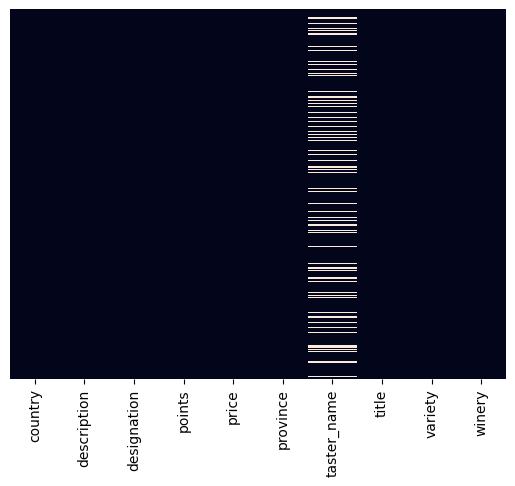

In [11]:
sb.heatmap(wine_filtered.isnull(), yticklabels=False,cbar=False)

<ipython-input-12-ca63123d1f41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_filtered["taster_name"] = wine_filtered['taster_name'].fillna("Unknown")


<Axes: >

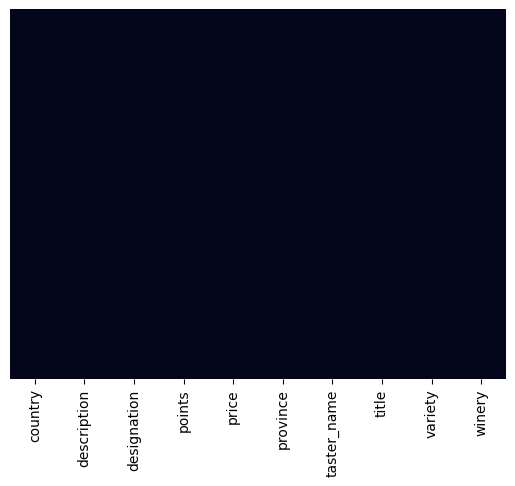

In [12]:
wine_filtered["taster_name"] = wine_filtered['taster_name'].fillna("Unknown")
sb.heatmap(wine_filtered.isnull(), yticklabels=False,cbar=False)

In [13]:
# Removing duplicates
unique_wine = wine_filtered#.drop_duplicates()
unique_wine = unique_wine.reset_index(drop=True)
print(len(unique_wine))
unique_wine_desc = unique_wine
unique_wine = unique_wine.drop("description", axis=1)
unique_wine.head()

113734


,country,designation,points,price,province,taster_name,title,variety,winery
0,Portugal,Avidagos,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,Unknown,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Ars In Vitro,87,15.0,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [14]:
len(unique_wine)

113734

In [15]:
len(unique_wine_desc)

113734

In [16]:
corpus = []
for i in range(0, len(unique_wine)):
    description = re.sub('[^a-zA-Z]', ' ', unique_wine_desc['description'][i])
    description = description.lower().split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    description = [ps.stem(word) for word in description if not word in set(all_stopwords)]
    description = ' '.join(description)
    corpus.append(description)

In [17]:
unique_words = set()
for text in corpus:
    unique_words.update(text.split())
length = len(unique_words)
print(f"Number of unique words: {length}")

Number of unique words: 20283


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
words_array = cv.fit_transform(corpus).toarray()
words_df = pd.DataFrame(words_array)
X = pd.concat([words_df.reset_index(drop=True), unique_wine.reset_index(drop=True)], axis=1)
Y = unique_wine["points"]
X = X.drop("points", axis=1)

In [19]:
Y.shape

(113734,)

In [20]:
X.shape

(113734, 2008)

<Axes: >

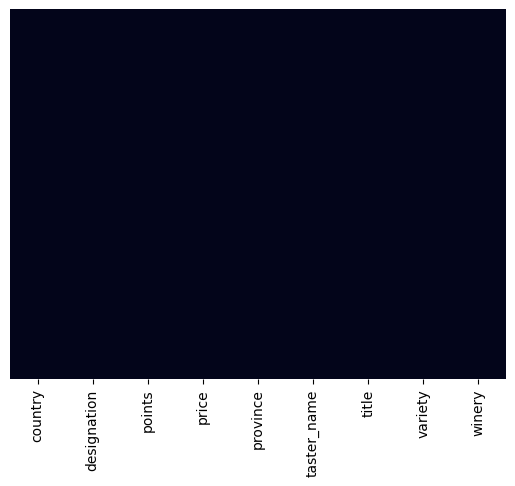

In [21]:
sb.heatmap(unique_wine.isnull(), yticklabels=False, cbar=False)

In [22]:
missing_values = X.isnull().sum()
for col, num in missing_values.items():
    if num > 0:
        print(f"{col}: {num} missing values")

country: 59 missing values
province: 59 missing values
variety: 1 missing values


In [23]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1998,1999,country,designation,price,province,taster_name,title,variety,winery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,Portugal,Avidagos,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,0,0,0,0,0,0,0,0,0,0,...,0,0,US,Unknown,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,0,0,0,0,0,0,0,0,0,0,...,0,0,US,Reserve Late Harvest,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,0,0,0,0,0,0,0,0,0,0,...,0,0,US,Vintner's Reserve Wild Child Block,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,0,0,0,0,0,0,0,0,0,0,...,0,0,Spain,Ars In Vitro,15.0,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [24]:
X["variety"].value_counts()

variety
Pinot Noir                  11834
Chardonnay                  10594
Red Blend                    7941
Cabernet Sauvignon           7887
Riesling                     4779
                            ...  
Pinotage-Merlot                 1
Maria Gomes-Bical               1
Mazuelo                         1
Syrah-Grenache-Viognier         1
Bobal-Cabernet Sauvignon        1
Name: count, Length: 692, dtype: int64

In [25]:
X_new = X.drop(["winery", "designation", "title"], axis=1)

In [26]:
X_new.columns = pd.DataFrame(X_new).columns.astype(str)

In [27]:
X.shape

(113734, 2008)

In [28]:
Y.shape

(113734,)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["country", "province", "taster_name", "variety"])], remainder='passthrough')
X_new = np.array(ct.fit_transform(X_new))

In [30]:
X_new

array([[ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ...,  0.,  0., 14.],
       [ 0.,  0.,  0., ...,  0.,  0., 13.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 30.],
       [ 0.,  0.,  0., ...,  0.,  0., 32.],
       [ 0.,  0.,  0., ...,  0.,  0., 21.]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=1)

In [35]:
from xgboost import XGBRegressor
regressor = XGBRegressor(enable_categorical=True)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
y_hat = regressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2: ", r2_score(y_train,regressor.predict(X_train)), "rmse: ", mean_squared_error(y_train, regressor.predict(X_train)))
print("r2: ", r2_score(y_test, y_hat), "rmse: ", mean_squared_error(y_test, regressor.predict(X_test)))

r2:  0.751193240833515 rmse:  2.1073278088561103
r2:  0.7012837449844003 rmse:  2.4942982351680913
